In [1]:
# Library load
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
print(os.listdir("C://Users/isang/OneDrive/Desktop/WM/data"))

['LSWMD.pkl']


In [3]:
df = pd.read_pickle("C://Users/isang/OneDrive/Desktop/WM/data/LSWMD.pkl")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trianTestLabel  811457 non-null  object 
 5   failureType     811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


In [4]:
df.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]


In [5]:
f_squeeze = lambda x:str(np.squeeze(x))
df['failureType'] = df['failureType'].map(f_squeeze)
df['trianTestLabel'] = df['trianTestLabel'].map(f_squeeze)
df.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,Training,none
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,Training,none
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,Training,none
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,Training,none
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,Training,none


In [6]:
df.tail()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,Test,Edge-Ring
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,Test,Edge-Loc
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,25.0,Test,Edge-Ring
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47543,1.0,[],[]
811456,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47543,2.0,[],[]


In [7]:
# Number of Wafer Map in Dataset
print(f"Wafer Map 개수 : {len(df)}") 

# Number of lots
# lot : Set of twenty-five wafers
print(f"lot 개수 : {len(df['lotName'].value_counts())}")

# Number of Wafers
print(f"lot 개수 x Wafer 묶음 : {25*len(df['lotName'].value_counts())}")

Wafer Map 개수 : 811457
lot 개수 : 46293
lot 개수 x Wafer 묶음 : 1157325


In [8]:
df['lotName'].value_counts()

lotName
lot1        25
lot26113    25
lot26129    25
lot26125    25
lot26124    25
            ..
lot9377      1
lot33363     1
lot33362     1
lot33337     1
lot31847     1
Name: count, Length: 46293, dtype: int64

In [9]:
df_counts = df['lotName'].value_counts().reset_index()

df_counts.columns = ['lotName', 'cnt']

len(df_counts[df_counts['cnt'] == 25])

21762

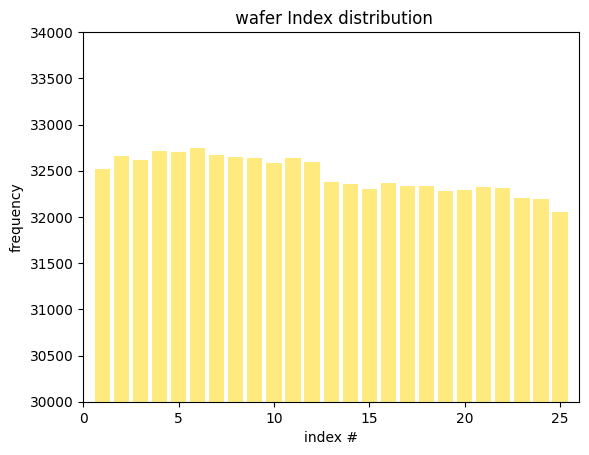

In [10]:
uni_Index=np.unique(df.waferIndex, return_counts=True)
plt.bar(uni_Index[0],uni_Index[1], color='gold', align='center', alpha=0.5)
plt.title(" wafer Index distribution")
plt.xlabel("index #")
plt.ylabel("frequency")
plt.xlim(0,26)
plt.ylim(30000,34000)
plt.show()

In [11]:
df = df.drop(['waferIndex'], axis=1)

In [12]:
def find_dim(x):                # 'waferMap' 값을 받아 
    dim0=np.size(x, axis=0)
    dim1=np.size(x, axis=1)
    return dim0, dim1

df['waferMapDim']=df.waferMap.apply(find_dim)
df.sample(5)

,waferMap,dieSize,lotName,trianTestLabel,failureType,waferMapDim
193350,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",5342.0,lot12239,[],[],"(89, 76)"
361885,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1080.0,lot21661,[],[],"(35, 40)"
76279,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2,...",846.0,lot5644,[],[],"(33, 33)"
481281,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1,...",515.0,lot29821,[],[],"(25, 27)"
217102,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2340.0,lot13770,[],[],"(60, 50)"


In [13]:
max(df.waferMapDim), min(df.waferMapDim)

((300, 202), (6, 21))

In [14]:
uni_waferDim=np.unique(df.waferMapDim, return_counts=True)
uni_waferDim[0].shape[0]

632

## Missing Value & Failure Type Check Part

In [15]:
# Extract unique value in sublist   
unique_trainTestNum_types = df['trianTestLabel'].unique()
unique_failure_types = df['failureType'].unique()

print(unique_trainTestNum_types)
print(unique_failure_types)

['Training' '[]' 'Test']
['none' 'Loc' '[]' 'Edge-Loc' 'Center' 'Edge-Ring' 'Scratch' 'Random'
 'Near-full' 'Donut']


In [45]:
# Add new columns for Mapping about 'failureType' & 'trainTestLabel'
df['failureNum']=df.failureType
df['trainTestNum']=df.trianTestLabel

mapping_type={'Center':0, 
              'Donut':1, 
              'Edge-Loc':2, 
              'Edge-Ring':3, 
              'Loc':4, 
              'Random':5,
              'Scratch':6, 
              'Near-full':7, 
              'none':8,
              '[]': 9}

mapping_traintest={'Training':0, 'Test':1, '[]': 2}

# Mapping with numbers
df=df.replace({'failureNum':mapping_type, 'trainTestNum':mapping_traintest})

df.sample(10)

,waferMap,dieSize,lotName,trianTestLabel,failureType,waferMapDim,failureNum,trainTestNum
155499,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",5085.0,lot10080,[],[],"(87, 74)",9,2
454353,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,...",733.0,lot27934,[],[],"(31, 31)",9,2
218289,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",10637.0,lot13817,[],[],"(115, 117)",9,2
237658,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1999.0,lot14826,Training,Edge-Ring,"(48, 52)",3,0
405082,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",564.0,lot24233,[],[],"(29, 26)",9,2
752273,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1,...",505.0,lot45137,Training,none,"(27, 25)",8,0
666662,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,...",712.0,lot41508,[],[],"(32, 29)",9,2
616893,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,...",686.0,lot38728,[],[],"(31, 28)",9,2
299321,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",4423.0,lot18285,[],[],"(74, 76)",9,2
680467,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1,...",844.0,lot42228,Test,Edge-Loc,"(35, 31)",2,1


In [30]:
tol_wafers = df.shape[0]

tol_wafers

811457

In [36]:
# New dataframe with labels
df_withlabel = df[(df['failureNum'] >= 0) & (df['failureNum'] <= 8 )]
df_withlabel = df_withlabel.reset_index()

# New dataframe with patterns (Except for failureType = none)
df_withpattern = df[(df['failureNum'] >= 0) & (df['failureNum'] <= 7)]
df_withpattern = df_withpattern.reset_index()

# New dataframe without patterns (failureType = none)
df_nonpattern = df[(df['failureNum'] == 8)]

df_withlabel.shape[0], df_withpattern.shape[0], df_nonpattern.shape[0]


(172950, 25519, 147431)

In [37]:
df_withpattern.shape[0] + df_nonpattern.shape[0]

172950

In [46]:
df_other = df[~((df['failureNum'] >= 0) & (df['failureNum'] <= 8))]

if 172950 + len(df_other)== df.shape[0]:
    print(True)
# N of Data with label +  N of Data w/o label = N of Total data

True


In [40]:
df_other.head()

,waferMap,dieSize,lotName,trianTestLabel,failureType,waferMapDim,failureNum,trainTestNum
35,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,[],[],"(53, 58)",9,2
45,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,[],[],"(53, 58)",9,2
69,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot3,[],[],"(53, 58)",9,2
120,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot5,[],[],"(53, 58)",9,2
158,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 2,...",533.0,lot7,[],[],"(26, 26)",9,2


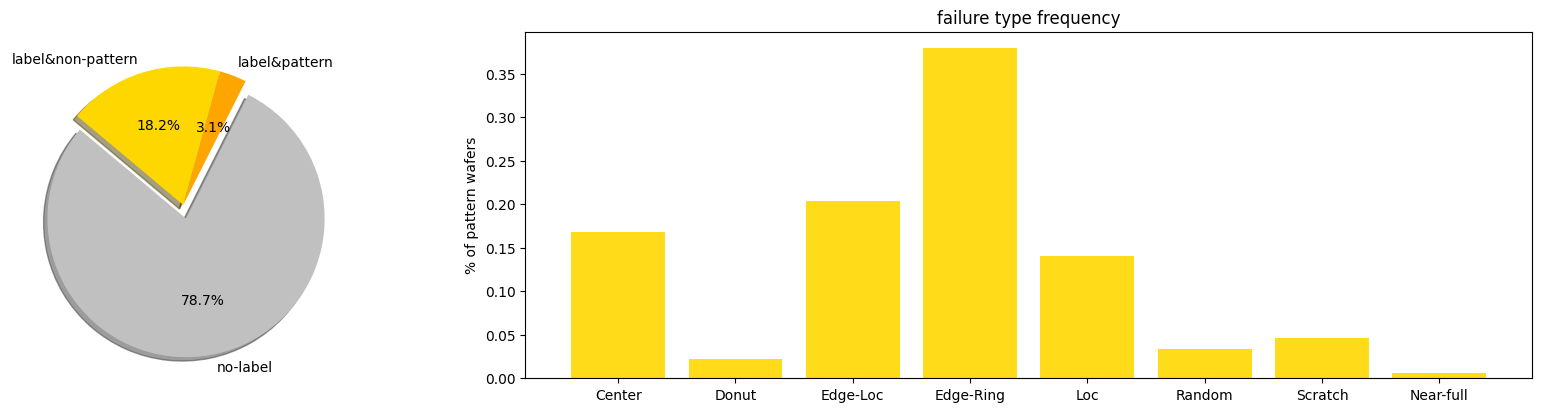

In [41]:
from matplotlib import gridspec
fig = plt.figure(figsize= (20, 4.5))
gs = gridspec.GridSpec(1,2,width_ratios=[1, 2.5])
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

no_wafers=[tol_wafers - df_withlabel.shape[0], 
           df_withpattern.shape[0], 
           df_nonpattern.shape[0]]

colors = ['silver', 'orange', 'gold']
explode = (0.1, 0, 0)  # explode 1st slice
labels = ['no-label','label&pattern','label&non-pattern']
ax1.pie(no_wafers, 
        explode=explode, 
        labels=labels, 
        colors=colors, 
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=140)

uni_pattern=np.unique(df_withpattern.failureNum, return_counts=True)
labels2 = ['','Center','Donut','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Near-full']
ax2.bar(uni_pattern[0],uni_pattern[1]/df_withpattern.shape[0], color='gold', align='center', alpha=0.9)
ax2.set_title("failure type frequency")
ax2.set_ylabel("% of pattern wafers")
ax2.set_xticklabels(labels2)

plt.show()

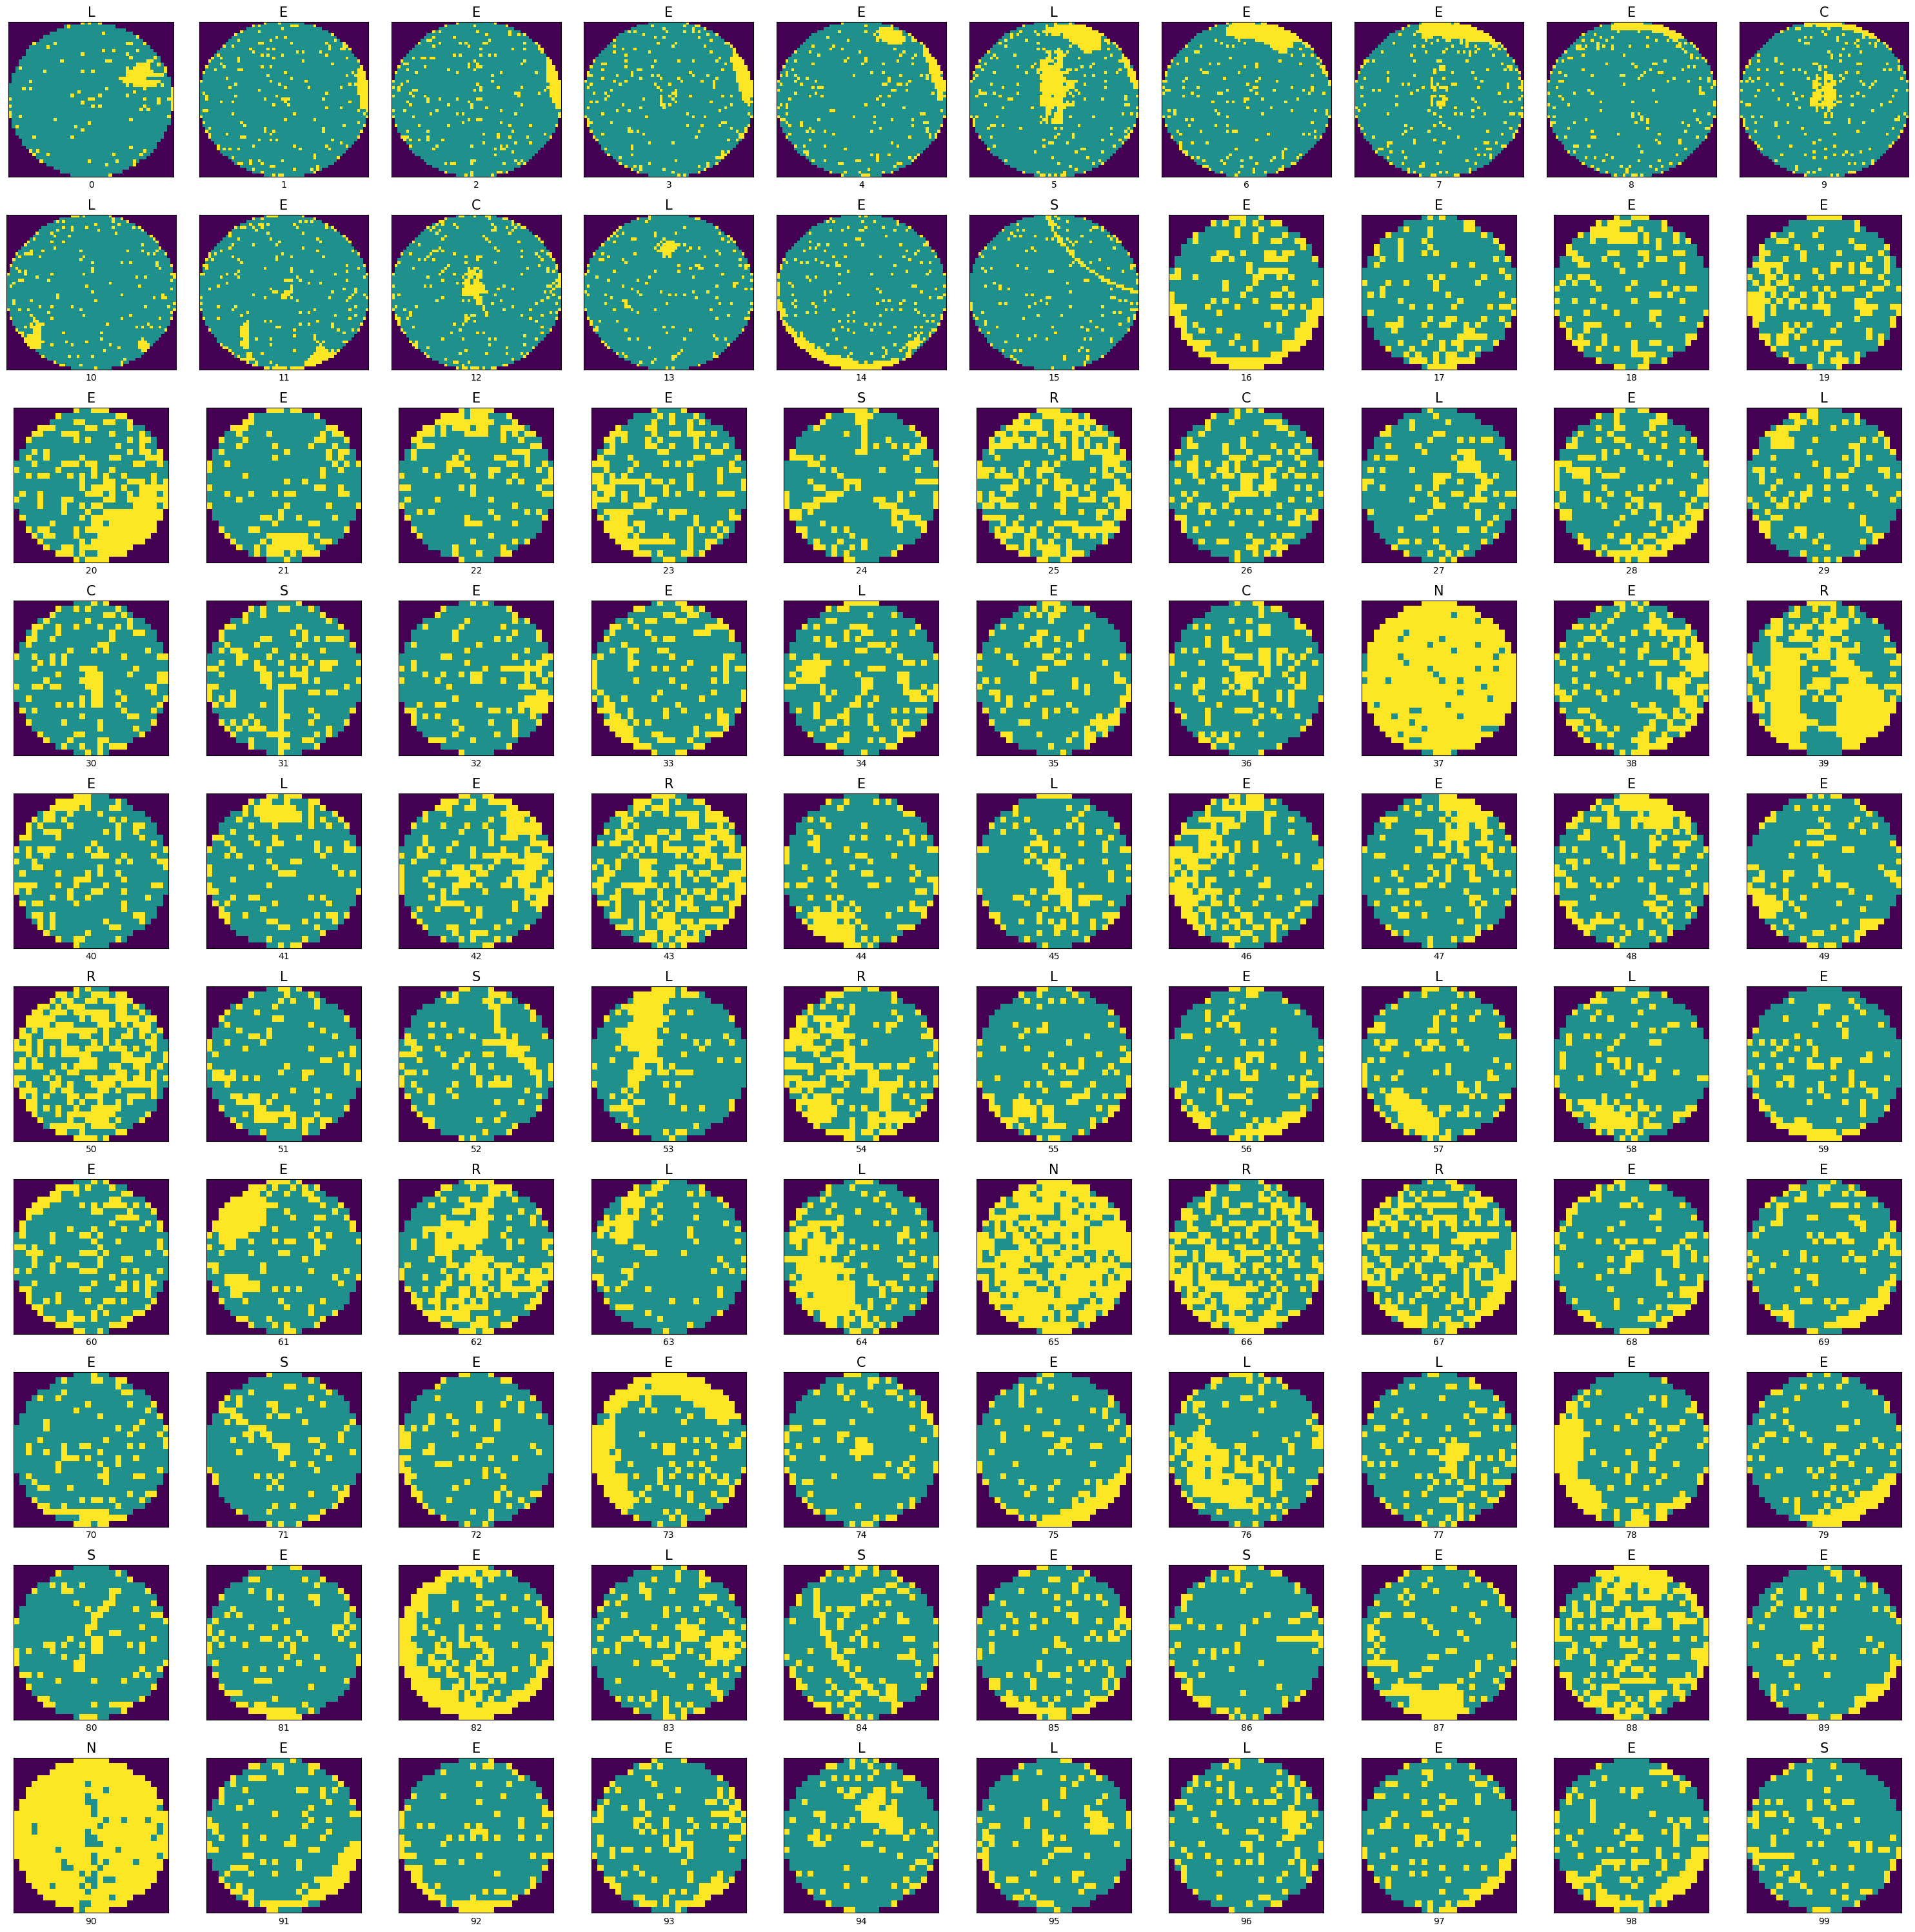

In [42]:
fig, ax = plt.subplots(nrows = 10, ncols = 10, figsize=(30, 30))
ax = ax.ravel(order='C')
for i in range(100):
    img = df_withpattern.waferMap[i]
    ax[i].imshow(img)
    ax[i].set_title(df_withpattern.failureType[i][0][0], fontsize=15)
    ax[i].set_xlabel(df_withpattern.index[i], fontsize=10)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.tight_layout()
plt.show() 

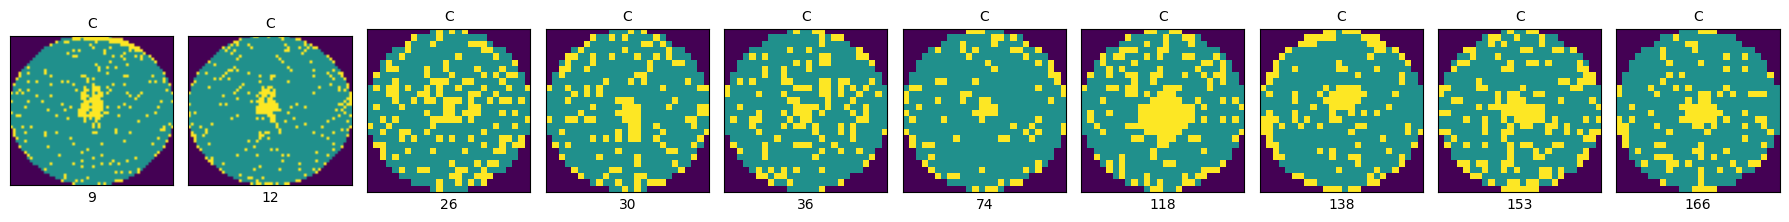

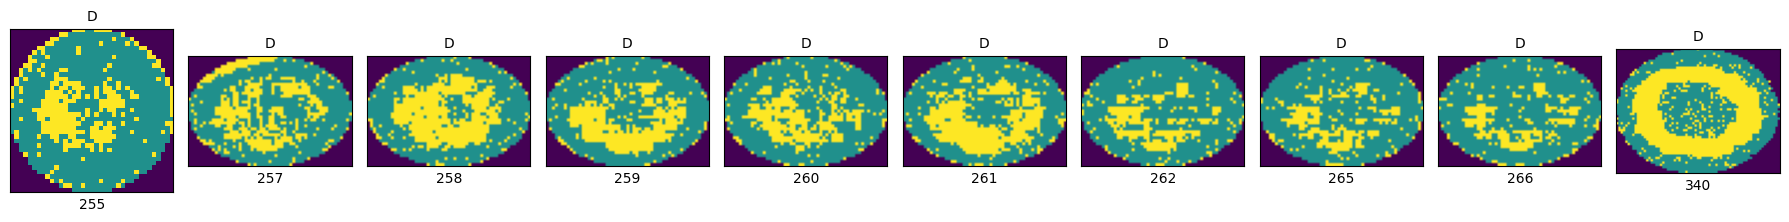

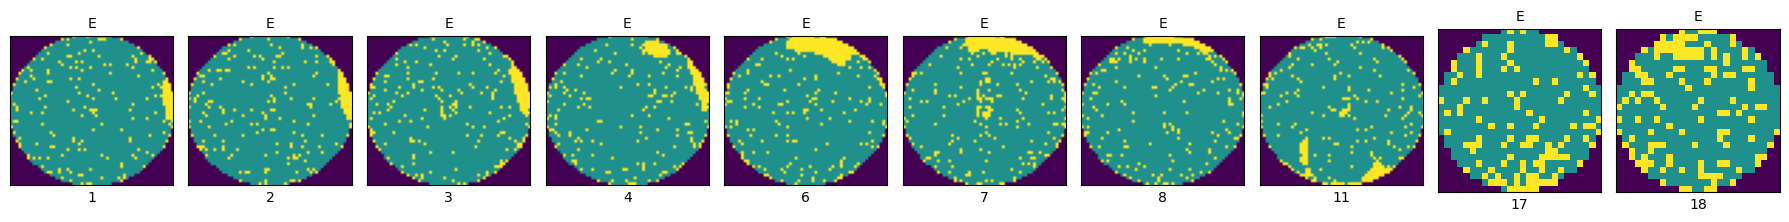

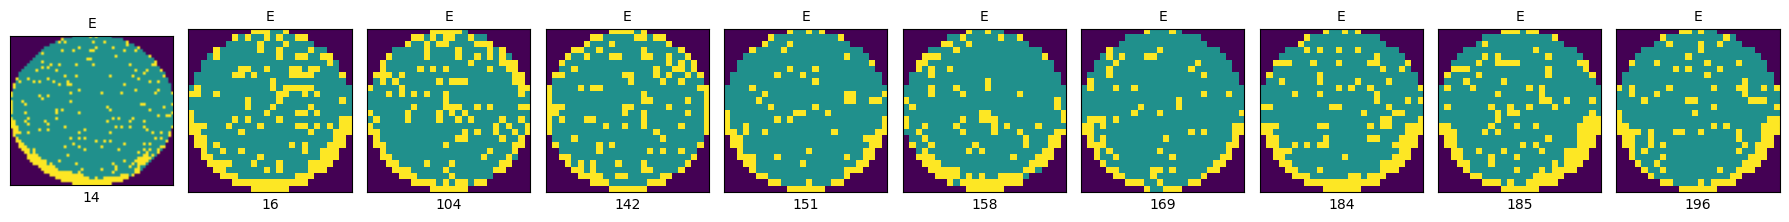

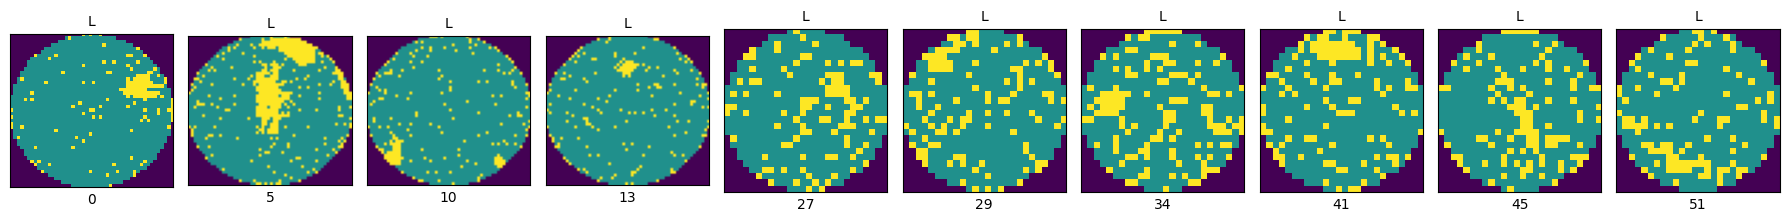

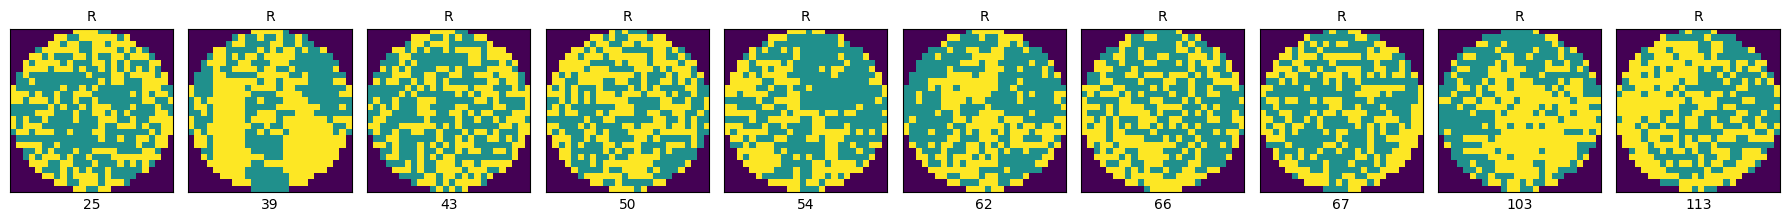

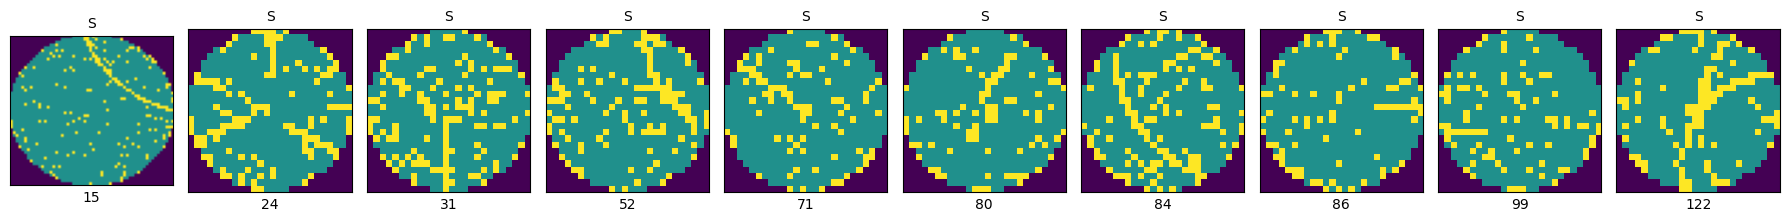

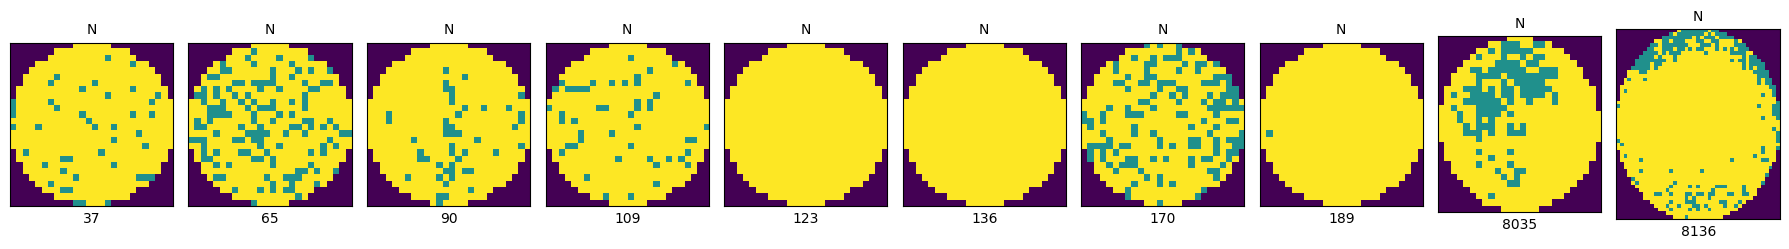

In [43]:
x=[0,1,2,3,4,5,6,7]
labels2=['Center','Donut','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Near-full']

for i in x:
    fig, ax=plt.subplots(nrows=1, ncols=10, figsize=(18,12))
    ax=ax.ravel(order='C') 
    for j in [i]:
        img=df_withpattern.waferMap[df_withpattern.failureType==labels2[j]]
        for k in range(10):
            ax[k].imshow(img[img.index[k]])
            ax[k].set_title(df_withpattern.failureType[img.index[k]][0][0], fontsize=10)
            ax[k].set_xlabel(df_withpattern.index[img.index[k]], fontsize=10)
            ax[k].set_xticks([])
            ax[k].set_yticks([])
    plt.tight_layout()
    plt.show()

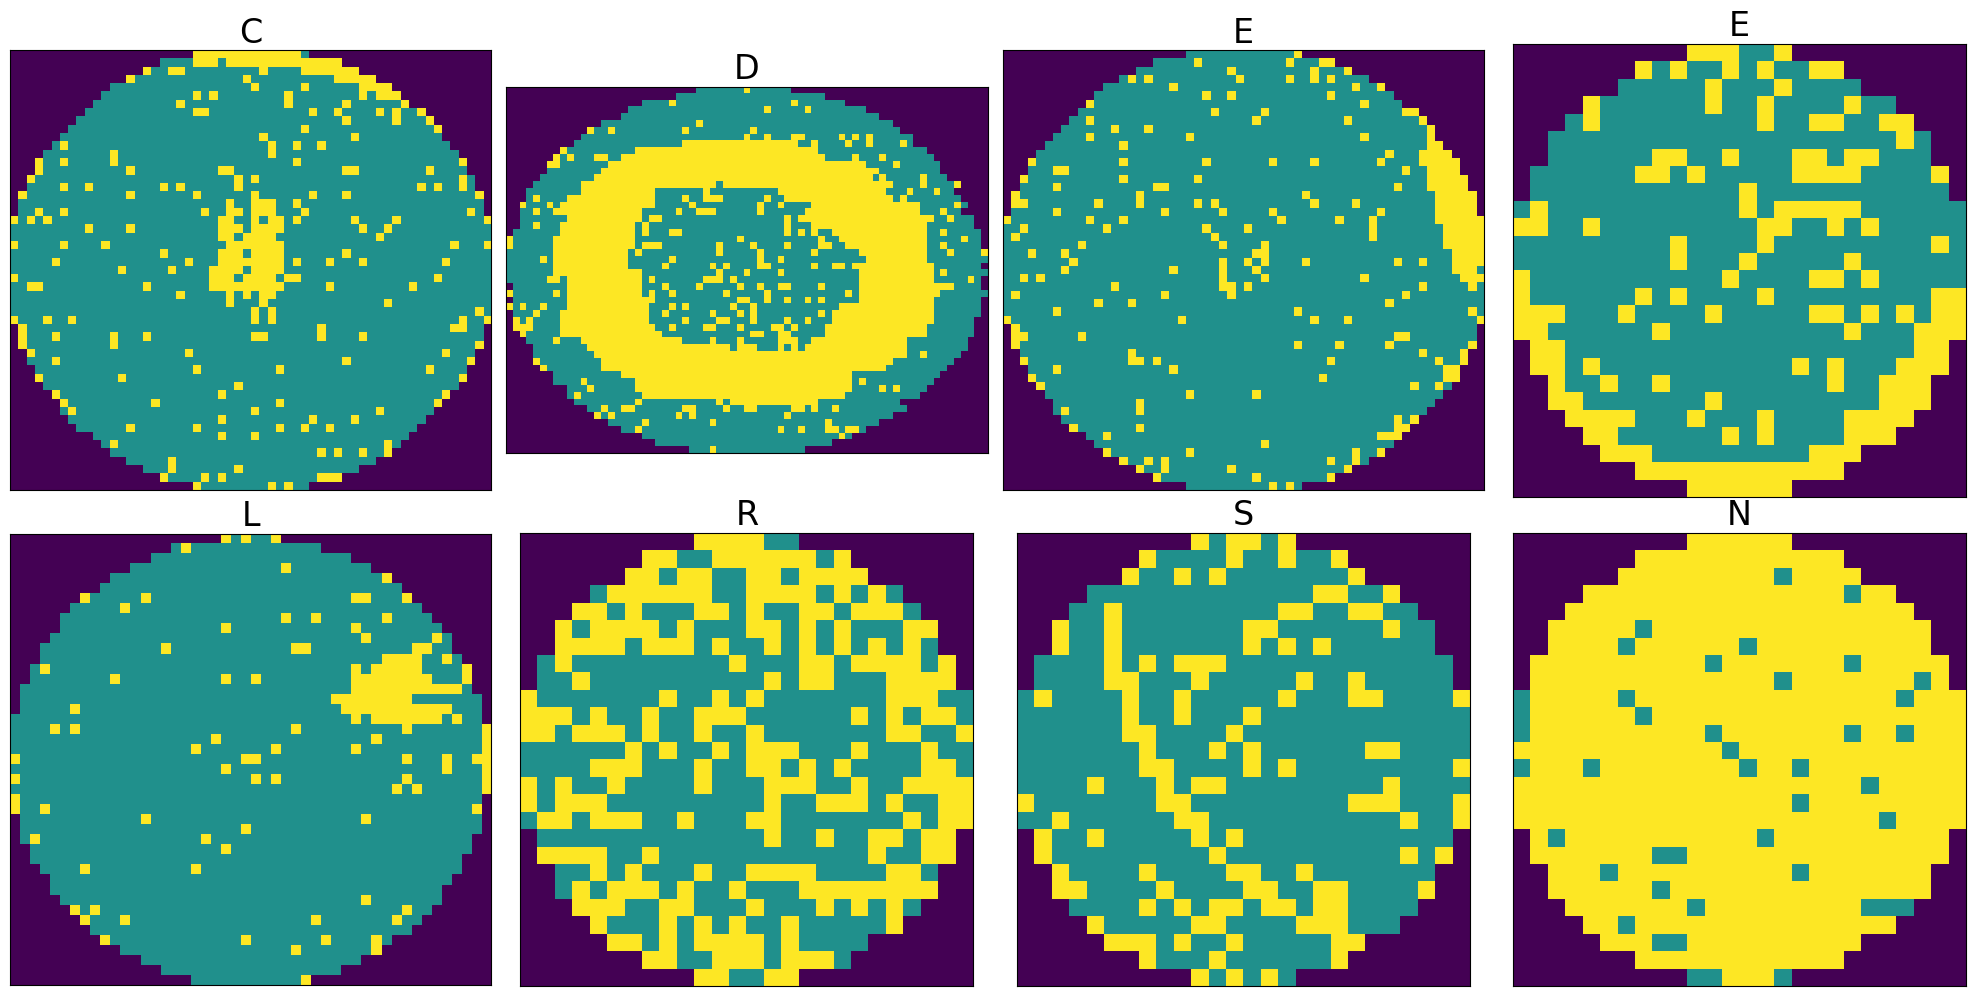

In [44]:
x=[9, 340, 3, 16, 0, 25, 84, 37]
labels2=['Center','Donut','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Near-full']

fig,ax=plt.subplots(nrows=2, ncols=4, figsize=(20,10))
ax=ax.ravel(order='C')
for i in range(8):
    img=df_withpattern.waferMap[x[i]]
    ax[i].imshow(img)
    ax[i].set_title(df_withpattern.failureType[x[i]][0][0], fontsize=24)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.tight_layout()
plt.show()